In [54]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
import tensorflow as tf
from PIL import Image
import glob
import cv2
import imghdr

C:\Users\USER\AppData\Local\Temp\ipykernel_17900\4174886910.py:11: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = r'C:\Users\USER\Desktop\Implementation\Images' 

In [5]:
data = tf.keras.utils.image_dataset_from_directory(r'C:\Users\USER\Desktop\Implementation\Images' )

Found 120 files belonging to 4 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

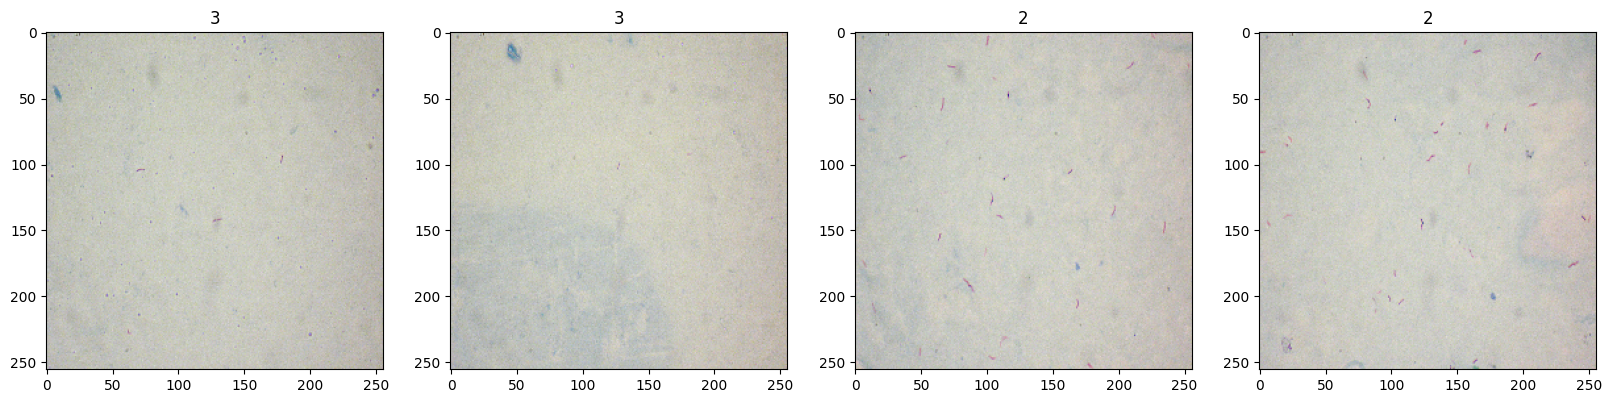

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[0.68039215, 0.6901961 , 0.6897059 ],
          [0.6696078 , 0.68578434, 0.65392154],
          [0.66568625, 0.69411767, 0.6985294 ],
          ...,
          [0.75686276, 0.7259804 , 0.68333334],
          [0.7681373 , 0.7323529 , 0.65294117],
          [0.77254903, 0.7651961 , 0.7078431 ]],
 
         [[0.6642157 , 0.64656866, 0.67009807],
          [0.6720588 , 0.675     , 0.65343136],
          [0.6166667 , 0.6338235 , 0.6122549 ],
          ...,
          [0.7416667 , 0.7348039 , 0.67058825],
          [0.7377451 , 0.7352941 , 0.69803923],
          [0.7323529 , 0.69803923, 0.6259804 ]],
 
         [[0.6661765 , 0.6813725 , 0.71960783],
          [0.6455882 , 0.64656866, 0.63235295],
          [0.6862745 , 0.69166666, 0.69803923],
          ...,
          [0.76029414, 0.72990197, 0.71960783],
          [0.7323529 , 0.722549  , 0.6642157 ],
          [0.7504902 , 0.69558823, 0.6602941 ]],
 
         ...,
 
         [[0.6362745 , 0.64215684, 0.7627451 ],
          [0.71078

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [12]:
train_size

2

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [15]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
model = Sequential()

In [55]:
image_exts = ['jpeg','jpg', 'bmp', 'png', 'JPG']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}: {type(e).__name__} - {str(e)}')


In [38]:
import numpy as np
from PIL import Image
import glob
import os

# Path to the directory containing images
image_dir = r'C:\Users\USER\Desktop\Implementation\Images\HH'

# Use glob to collect all image file paths in the directory
image_HH = glob.glob(os.path.join(image_dir, '*.*'))

# Check if the list of image paths is not empty
if not image_HH:
    print("No image files found in the directory.")
else:
    images = []
    for file in image_HH:
        try:
            # Open image and convert to numpy array
            img = Image.open(file)
            img_array = np.array(img)
            images.append(img_array)
        except Exception as e:
            print(f"Error loading image {file}: {e}")

    # Convert the list of images to a numpy array
    if images:
        image_HH_array = np.array(images)
        image_HH_array = image_HH_array / 255.0
        print("Shape of image_HH array:", image_HH_array.shape)
    else:
        print("No images were loaded successfully.")

Shape of image_HH array: (30, 2112, 2816, 3)


In [35]:
import numpy as np
from PIL import Image
import os
import tensorflow as tf

# Resize dimensions
resize_height = 256
resize_width = 256

# Load and resize images
images_resized = []
for file in image_HH:
    try:
        img = Image.open(file)
        img_resized = img.resize((resize_width, resize_height))
        img_array = np.array(img_resized)
        images_resized.append(img_array)
    except Exception as e:
        print(f"Error loading image {file}: {e}")

# Convert to NumPy array and normalize
if images_resized:
    image_HH_resized_array = np.array(images_resized)
    image_HH_resized_array = image_HH_resized_array / 255.0
    print("Shape of resized image_HH array:", image_HH_resized_array.shape)
else:
    print("No images were loaded successfully.")

Shape of resized image_HH array: (30, 256, 256, 3)


In [40]:
# Path to the directory containing images
image_dir1 = r'C:\Users\USER\Desktop\Implementation\Images\HL'

# Use glob to collect all image file paths in the directory
image_HL = glob.glob(os.path.join(image_dir1, '*.*'))

# Check if the list of image paths is not empty
if not image_HL:
    print("No image files found in the directory.")
else:
    images = []
    for file in image_HL:
        try:
            # Open image and convert to numpy array
            img1 = Image.open(file)
            img_array1 = np.array(img1)
            images.append(img_array1)
        except Exception as e:
            print(f"Error loading image {file}: {e}")

    # Convert the list of images to a numpy array
    if images:
        image_HL_array = np.array(images)
        image_HL_array = image_HL_array / 255.0
        print("Shape of image_HL array:", image_HL_array.shape)
    else:
        print("No images were loaded successfully.")

Shape of image_HL array: (30, 2112, 2816, 3)


In [41]:
# Resize dimensions
resize_height = 256
resize_width = 256

# Load and resize images
images_resized1 = []
for file in image_HL:
    try:
        img1 = Image.open(file)
        img_resized1 = img.resize((resize_width, resize_height))
        img_array1 = np.array(img_resized1)
        images_resized1.append(img_array1)
    except Exception as e:
        print(f"Error loading image {file}: {e}")

# Convert to NumPy array and normalize
if images_resized1:
    image_HL_resized_array = np.array(images_resized1)
    image_HL_resized_array = image_HL_resized_array / 255.0
    print("Shape of resized image_HL array:", image_HL_resized_array.shape)
else:
    print("No images were loaded successfully.")

Shape of resized image_HL array: (30, 256, 256, 3)


In [56]:
# Assuming you have already defined your model instance as `model`

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now you can proceed with training and evaluation
model.fit(np.vstack((image_HL, image_HH)), labels_combined, epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(np.vstack((image_HL, image_HH)), labels_combined, verbose=2)


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 2
'y' sizes: 60
